#### Importo las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Leo el archivo train con pandas

In [2]:
train = pd.read_parquet('train.parquet', engine= 'pyarrow')

#### Reviso los datos, viendo las primeras 5 filas con head

In [3]:
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


#### Chequeo que tenga las columnas y filas iniciales

In [4]:
train.shape

(346479, 22)

#### Observo las medidas estadísticas
#### veo valores cero en precio, despues volveré sobre éste punto

In [5]:
train.iloc[:,0:13].describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
train.iloc[:,13:22].describe()

,electric_vehicle_charge,comes_furnished,lat,long
count,346479.000000,346479.000000,344757.000000,344757.000000
mean,0.012792,0.048141,37.234363,-92.705415
std,0.112374,0.214065,5.550956,16.551071
min,0.000000,0.000000,-43.533300,-163.894000
25%,0.000000,0.000000,33.453100,-100.784000
50%,0.000000,0.000000,37.650100,-87.710800
75%,0.000000,0.000000,41.137900,-81.174600
max,1.000000,1.000000,102.036000,172.633000


#### Obvervo info de los datos; hay valores nulos en las siguientes columnas
#### - laundry_options 
#### - parking_options 
#### - description 
#### - lat 
#### - long

In [7]:
train.iloc[:,0:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 346479 non-null  int64  
 1   url                346479 non-null  object 
 2   region             346479 non-null  object 
 3   region_url         346479 non-null  object 
 4   price              346479 non-null  int64  
 5   type               346479 non-null  object 
 6   sqfeet             346479 non-null  int64  
 7   beds               346479 non-null  int64  
 8   baths              346479 non-null  float64
 9   cats_allowed       346479 non-null  int64  
 10  dogs_allowed       346479 non-null  int64  
 11  smoking_allowed    346479 non-null  int64  
 12  wheelchair_access  346479 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 34.4+ MB


In [8]:
train.iloc[:,13:22].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   electric_vehicle_charge  346479 non-null  int64  
 1   comes_furnished          346479 non-null  int64  
 2   laundry_options          275308 non-null  object 
 3   parking_options          219797 non-null  object 
 4   image_url                346479 non-null  object 
 5   description              346477 non-null  object 
 6   lat                      344757 non-null  float64
 7   long                     344757 non-null  float64
 8   state                    346479 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 23.8+ MB


In [9]:
train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

#### Chequeo los duplicados
#### no hay duplicados

In [10]:
train.duplicated().sum()

0

#### Ahora chequeo si hay duplicados en la columna descripcion y observo que si

In [11]:
train['description'].duplicated().sum()

91488

#### como la cantidad es mucha, tomo una muestra aleatoria para confirmarlo

In [12]:
dfdupli = train.loc[train['description'].duplicated(keep=False),'description']
dfdupli= dfdupli.groupby(dfdupli).apply(lambda x: tuple(x.index)).tolist()
dfdupli[10]

(36338, 90806, 221887)

In [13]:

train.loc[[36338, 90806, 221887], ['description','price', 'lat', 'long','region']]

,description,price,lat,long,region
36338,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Now Accepting...,725,43.0675,-76.4772,syracuse
90806,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Now Accepting...,725,43.0675,-76.4772,syracuse
221887,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Now Accepting...,725,43.0675,-76.4772,syracuse


#### Dado que con el paso anterior pude confirmarlo, ahora eliminos estos duplicados, ya que no se
#### justifique que sigan estando para el análisis requerido

In [14]:
train.drop_duplicates(subset='description', inplace=True)
train.shape

(254991, 22)

#### Verifico los duplicados por "url" y veo que no hay

In [15]:
train['url'].duplicated().sum()

0

#### ahora verifico los duplicados en la columna "image_url" considerando que la misma propiedad puede ser publicada mas de una vez

In [16]:
train['image_url'].duplicated().sum()

105628

#### la cantidad de duplicados en la columna image_url es mucha, tomo una muestra aleatoria

In [17]:
dfdupli = train.loc[train['image_url'].duplicated(keep=False),'image_url']
dfdupli= dfdupli.groupby(dfdupli).apply(lambda x: tuple(x.index)).tolist()
dfdupli[9]

(279747, 301599, 343102)

#### aca verifico que es la misma imagen y la misma propiedad
#### considerando que se publica varias veces y va actualizando su precio, me quedo con la fila que tiene el precio mas elevado

In [18]:
train.loc[[279747, 301599, 343102], ['image_url','lat','long', 'price', 'region']]

,image_url,lat,long,price,region
279747,https://images.craigslist.org/00000_1beeJ2Y07r...,42.2352,-83.7553,1063,ann arbor
301599,https://images.craigslist.org/00000_1beeJ2Y07r...,42.2352,-83.7553,1465,ann arbor
343102,https://images.craigslist.org/00000_1beeJ2Y07r...,42.2337,-83.7518,1345,ann arbor


In [19]:
train.drop_duplicates(subset='image_url', inplace=True, keep= 'last')

In [20]:
train.loc[[343102], ['image_url','lat','long', 'price']]

,image_url,lat,long,price
343102,https://images.craigslist.org/00000_1beeJ2Y07r...,42.2337,-83.7518,1345


#### Una vez elimandos éstos duplicados, chequeo las dimensiones

In [21]:
train.shape

(149363, 22)

#### Vuelvo al punto de valores faltantes, luego de eliminar los duplicados en la columna description

In [22]:
listaisna = train.isna().sum()
listaisna = listaisna[listaisna > 0]
listaisna

laundry_options    31179
parking_options    50172
lat                  821
long                 821
dtype: int64

In [23]:
## Porcentualmente
list =listaisna[listaisna > 0].div(train.shape[0]).mul(100)
list

laundry_options    20.874648
parking_options    33.590648
lat                 0.549668
long                0.549668
dtype: float64

In [24]:
train.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

#### Dado que en las columnas latitud y longitud existen sólo un 0.5 % de valores nulos, decido eliminar ambas columnas del analisis


In [25]:
borrar= ['lat', 'long']
train.drop(columns= borrar, inplace= True)

#### Chequeo que se borraron las columnas

In [26]:
train.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description',
       'state'],
      dtype='object')

#### Con respecto a las columnas laundry_options y parking_options, que tienen muchos valores NaN, dado el tiempo y el poco
#### conocimiento del tema, luego de estar un dia tratando de implementar NLP, veo que no puedo hacerlo y decido completar
#### los valores NaN con la moda para cada caso


In [27]:
train.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', None, 'laundry on site',
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [28]:
train.laundry_options.mode()

0    w/d in unit
dtype: object

In [29]:
train.parking_options.unique()

array(['detached garage', 'off-street parking', None, 'attached garage',
       'carport', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [30]:
train.parking_options.mode()

0    off-street parking
dtype: object

In [31]:
train['laundry_options'] = train.laundry_options.fillna(train.laundry_options.mode()[0])
train['parking_options'] = train.parking_options.fillna(train.parking_options.mode()[0])

In [32]:
train.laundry_options.isna().sum()
print (train.parking_options.isna().sum())

0


In [33]:
train.shape

(149363, 20)

In [34]:
train.to_csv('train_limpio', index= False)

#### ordeno por precio para ver los que tienen precio cero y voy a sacar del análisis, porque considero que no existen propiedades
#### con precio cero, no es posible considerarlas

In [35]:
train.price.sort_values()

152043             0
303300             0
1378               0
15570              0
165070             0
             ...    
199738      10321189
177615      11621360
297036      12000000
79076       18502000
106214    2768307249
Name: price, Length: 149363, dtype: int64

#### Hago una mascara con los valores que quiero sacar, por indice para eliminar esas filas

In [36]:
val = train.loc[train['price'] <= 0].index
val

Int64Index([   961,   1378,   2167,   2666,   2712,   3634,   4274,   4546,
              4550,   6253,
            ...
            341338, 341986, 342460, 343532, 343812, 344369, 344513, 345275,
            345569, 346295],
           dtype='int64', length=483)

In [37]:
train.drop(val, inplace = True)

#### Elimine las filas con precio cero y ahora el train contiene 477 filas menos

In [38]:
train.shape

(148880, 20)

#### Reviso nuevamente el tipo de datos

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148880 entries, 0 to 346478
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       148880 non-null  int64  
 1   url                      148880 non-null  object 
 2   region                   148880 non-null  object 
 3   region_url               148880 non-null  object 
 4   price                    148880 non-null  int64  
 5   type                     148880 non-null  object 
 6   sqfeet                   148880 non-null  int64  
 7   beds                     148880 non-null  int64  
 8   baths                    148880 non-null  float64
 9   cats_allowed             148880 non-null  int64  
 10  dogs_allowed             148880 non-null  int64  
 11  smoking_allowed          148880 non-null  int64  
 12  wheelchair_access        148880 non-null  int64  
 13  electric_vehicle_charge  148880 non-null  int64  
 14  come

#### Modifico el tipo de dato de baths, para servira para mi analisis

In [40]:
train['baths']=train['baths'].astype (int)

#### Ahora elimino las columnas que no son necesarias para el análisis

In [41]:
otro_para_borrar= ['id', 'url', 'region_url', 'image_url', 'description', 'state']
train.drop(columns= otro_para_borrar, inplace= True)

#### Miro las columnas categoricas
#### las tengo que codificar

In [42]:
categoricas= ['type', 'laundry_options', 'parking_options', 'region']

In [43]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Veo las categoricas
print(train[categoricas].head())

# CreoLabelEncoder : le
le = LabelEncoder()

# Aplico LabelEncoder a las columnas
train[categoricas] = train[categoricas].apply(lambda x: le.fit_transform(x))

# Veo las 5 filas de las categoricas
print(train[categoricas].head())

        type laundry_options     parking_options                   region
0      house     w/d in unit     detached garage                    boise
2  apartment     w/d hookups  off-street parking  norfolk / hampton roads
3      house     w/d in unit  off-street parking                  phoenix
5      house     w/d hookups     attached garage      dallas / fort worth
7  apartment     w/d hookups  off-street parking                  wichita
   type  laundry_options  parking_options  region
0     6                4                2      33
2     0                3                4     236
3     6                4                4     269
5     6                3                0      72
7     0                3                4     390


#### Reviso nuevamente el tipo de datos

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148880 entries, 0 to 346478
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   region                   148880 non-null  int32
 1   price                    148880 non-null  int64
 2   type                     148880 non-null  int32
 3   sqfeet                   148880 non-null  int64
 4   beds                     148880 non-null  int64
 5   baths                    148880 non-null  int32
 6   cats_allowed             148880 non-null  int64
 7   dogs_allowed             148880 non-null  int64
 8   smoking_allowed          148880 non-null  int64
 9   wheelchair_access        148880 non-null  int64
 10  electric_vehicle_charge  148880 non-null  int64
 11  comes_furnished          148880 non-null  int64
 12  laundry_options          148880 non-null  int32
 13  parking_options          148880 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 

#### Exploro con un grafico la correlacion

<AxesSubplot:>

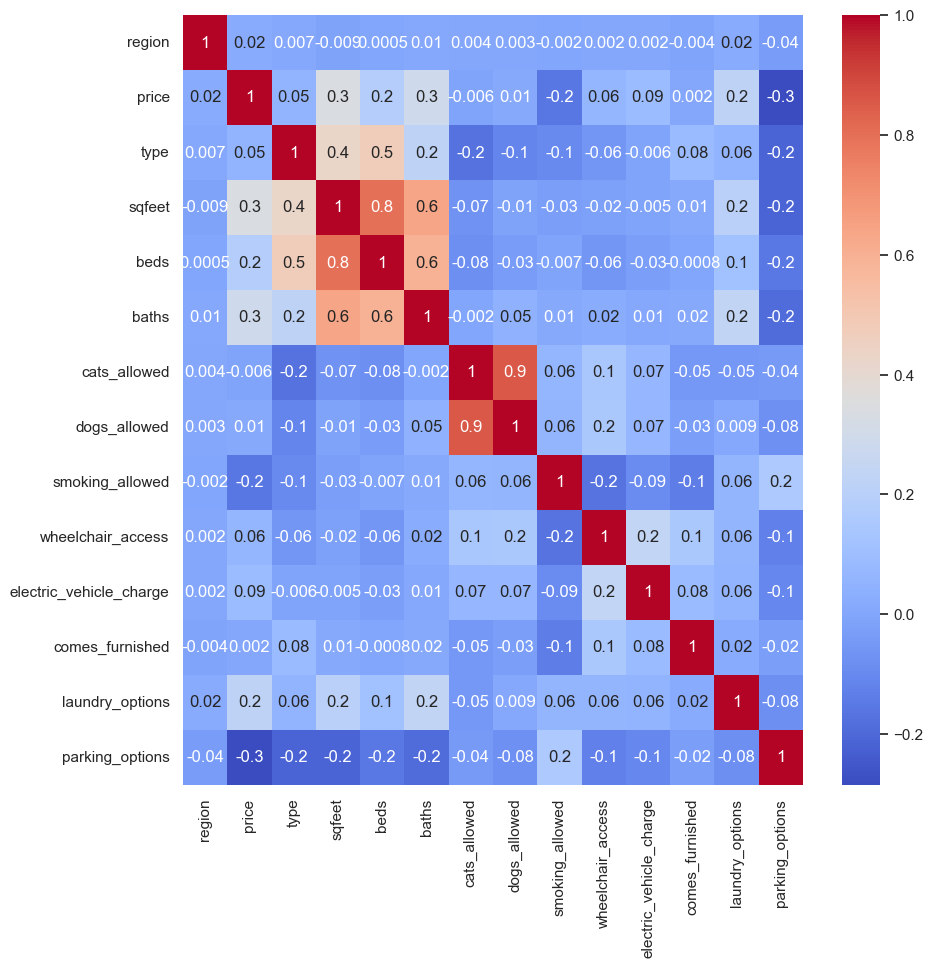

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

#### Creo la variable que solicitan

In [217]:
train['category_price'] = np.where(train['price'] <=900, 1, 0)
train['category_price'].value_counts()

0    103877
1     45003
Name: category_price, dtype: int64

#### Observo con respecto a la variable target

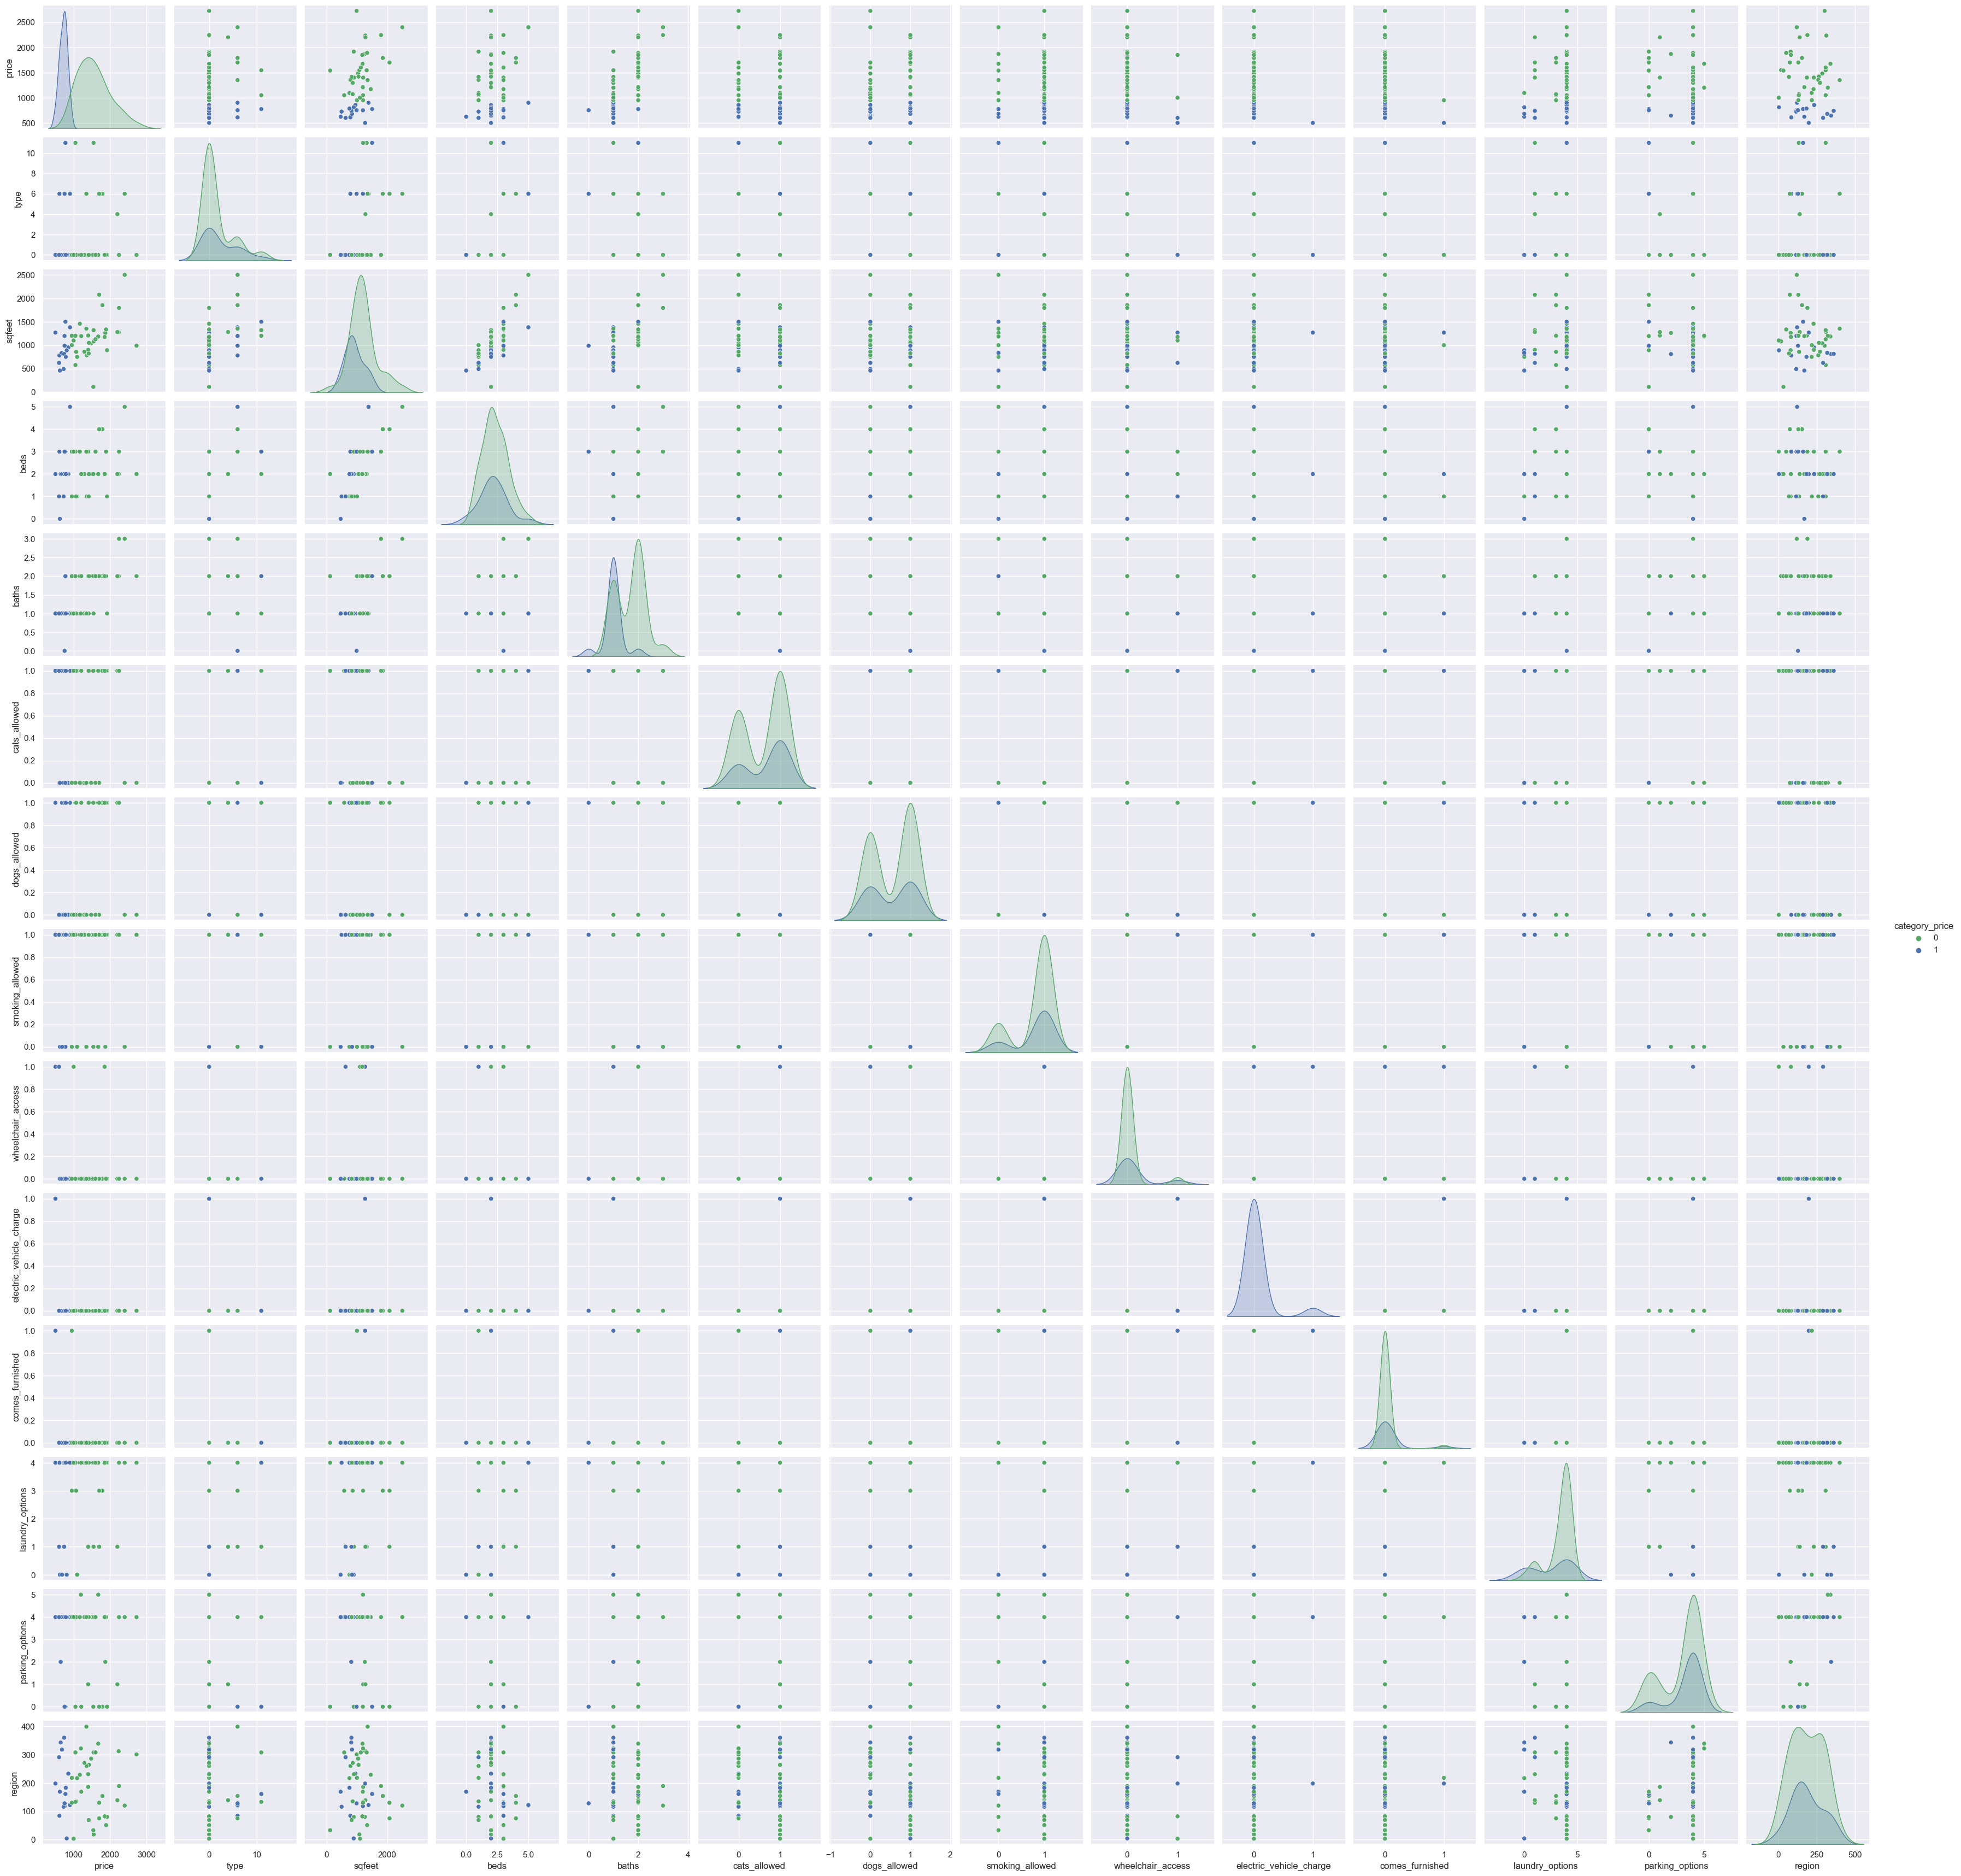

In [219]:
sns.pairplot(train[['price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'region','category_price'  ]].sample(50), hue="category_price", palette = ['g', 'b'])
plt.show()

####  Borro la columna price

In [220]:
train.drop(columns= 'price', inplace= True)

In [221]:
train.shape

(148880, 14)

In [222]:
train.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,category_price
0,33,6,1200,2,2,1,1,1,0,0,0,4,2,0
2,236,0,900,2,2,0,0,1,0,0,0,3,4,0
3,269,6,1469,3,2,1,1,1,0,0,0,4,4,0
5,72,6,1649,3,2,1,1,1,0,0,0,3,0,0
7,390,0,1050,3,2,1,1,1,0,0,0,3,4,0


#### Exporto el train limpio a csv

In [223]:
train.to_csv('train_con_eda', index= False)

#### Continua en "Modelo_DTC"